In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('uber.csv')

# Data preprocessing part

In [4]:

df.rename(columns = lambda x : x.strip(), inplace = True)
print(df.info())
df['Date'].fillna(method = 'ffill', inplace = True)

def timestamp(date,time):
    return pd.to_datetime(f"{date} {time}:00")

df['Timestamp'] = df.apply(lambda row: timestamp(row['Date'],row['Time (Local)']), axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             15 non-null     object
 1   Time (Local)     336 non-null    int64 
 2   Eyeballs         336 non-null    int64 
 3   Zeroes           336 non-null    int64 
 4   Completed Trips  336 non-null    int64 
 5   Requests         336 non-null    int64 
 6   Unique Drivers   336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB
None


# Plotting values with dates and looking for relation between them

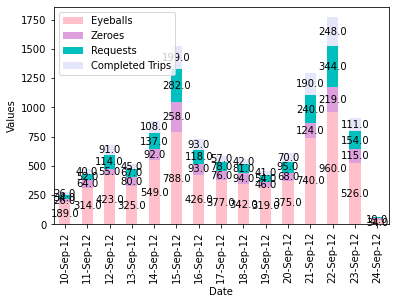

In [5]:
my_colors = ['pink', 'plum', 'c', 'lavender']

ax = df[['Date','Eyeballs', 'Zeroes', 'Requests', 'Completed Trips']].groupby('Date').sum().reset_index().plot(
    kind='bar', stacked=True, x='Date', color=my_colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 10 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)

    plt.ylabel("Values")
plt.show()

# Aggregating and summing all values based on whether it falls under which weekday

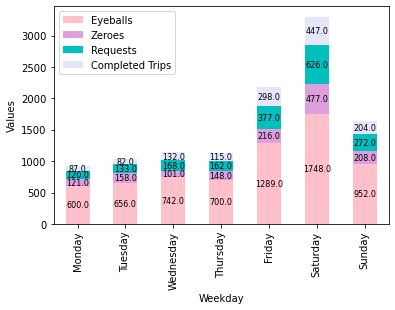

In [6]:
df['Weekday'] = df['Timestamp'].dt.weekday
df_agg_weekday = df.groupby('Weekday',as_index = False).sum()

day_of_week={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_agg_weekday['Weekday'] = df_agg_weekday['Weekday'].map(day_of_week)


ax=df_agg_weekday[['Weekday','Eyeballs', 'Zeroes', 'Requests', 'Completed Trips']].plot(
    kind='bar', stacked=True, x='Weekday', color=my_colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 10 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)
plt.ylabel("Values")
plt.show()

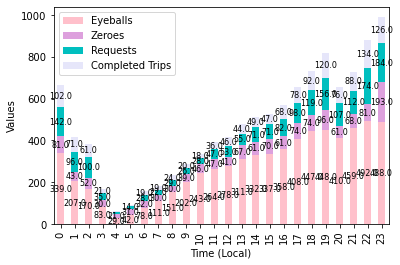

In [12]:
#  Aggregated results by the hour

ax = df[['Time (Local)','Eyeballs', 'Zeroes', 'Requests', 'Completed Trips']].groupby('Time (Local)', as_index = False).sum().plot(
    kind='bar', stacked=True, x='Time (Local)', color=my_colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 10 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)
plt.ylabel("Values")
plt.show()

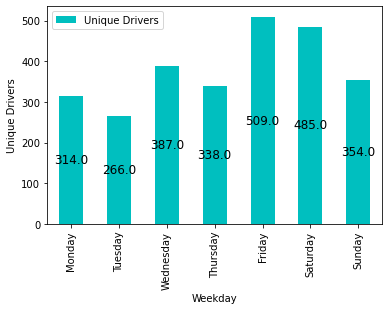

In [13]:
# unique drivers' distribution aggregated on weekdays and hours as next plots
ax = df_agg_weekday[['Weekday','Unique Drivers']].plot(
    kind='bar', stacked=True, x='Weekday', color='c')

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=12)
plt.ylabel("Unique Drivers")
plt.show()

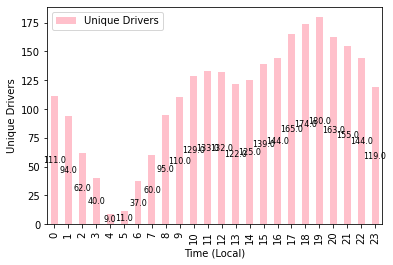

In [14]:
ax = df[['Time (Local)','Unique Drivers']].groupby('Time (Local)', as_index= False).sum().plot(
    kind='bar', stacked=True, x='Time (Local)', color=my_colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)
plt.ylabel("Unique Drivers")
plt.show()

# Question 1
# Which date had the most completed trips during the two week period?

In [16]:
grouped_df_day = df.groupby('Date', as_index = False)['Completed Trips'].sum()
max_trip_day = grouped_df_day[grouped_df_day['Completed Trips'] == grouped_df_day['Completed Trips'].max()]
max_trip_day

,Date,Completed Trips
12,22-Sep-12,248


# Question 2
# What was the highest number of completed trips within a 24 hour period?

In [27]:
df_agg_twentyfour_hrs = df.set_index("Timestamp")
df_agg_twentyfour_hrs = df_agg_twentyfour_hrs[df_agg_twentyfour_hrs.columns].rolling(window=24, min_periods=1).sum()
twentfour_largest = df_agg_twentyfour_hrs.nlargest(1, 'Completed Trips')
twentfour_largest

C:\Users\khalilli.k\AppData\Local\Temp\ipykernel_14984\1865619345.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df_agg_twentyfour_hrs = df_agg_twentyfour_hrs[df_agg_twentyfour_hrs.columns].rolling(window=24, min_periods=1).sum()


,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Weekday
Timestamp,,,,,,,
2012-09-22 16:00:00,276.0,1015.0,207.0,278.0,367.0,349.0,113.0


# Question 3
# Which hour of the day had the most requests during the two week period?

In [30]:
grouped_df_hour = df.groupby('Time (Local)', as_index = False).sum()
max_trip_hour = grouped_df_hour[grouped_df_hour['Requests'] == grouped_df_hour['Requests'].max()]
max_trip_hour = max_trip_hour['Time (Local)']
max_trip_hour

23    23
Name: Time (Local), dtype: int64

# Question 4
# What percentages of all zeroes during the two week period occurred on weekend 
# (Friday at 5 pm to Sunday at 3 am)? 

In [31]:
# Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)
df['Date'] = pd.to_datetime(df['Date'] , dayfirst = True)
df['Date']  = df['Date'].dt.date
df['day_of_week'] = df['Date'].apply(lambda x : x.weekday())
df_interval = df[((df['day_of_week'] == 4) & (df['Time (Local)'] >= 17)) 
                          | (df['day_of_week'] == 5) |
                          ((df['day_of_week'] == 6) & (df['Time (Local)'] < 3))]


percentage = (df_interval['Zeroes'].sum() /df['Zeroes'].sum() ) * 100
percentage

44.856543037088876

# Question 5
# What is the weighted average ratio of completed trips per driver during the two week period? 

In [ ]:
# Tip: "Weighted average" means your answer should account 
# for the total trip volume in each hour to determine the most accurate number in whole period.

In [33]:
df['ratio'] = (df['Completed Trips']/df['Unique Drivers']).round(2)
df['ratio'].replace([np.inf,-np.inf],0,inplace = True)
df['ratio'].fillna(0, inplace = True)

weighted_average = (df['ratio'] * df['Completed Trips']).sum()/(df['Completed Trips'].sum())
weighted_average_ratio = np.average(df['ratio'],weights = df['Completed Trips'])
weighted_average_ratio

0.8269670329670329

# Question 6

In [35]:
# #In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 
# # 8 consecutive hours over the two week period 
# # in terms of unique requests? A new shift starts 
# # in every 8 hours. Assume that a driver will work the same shift each day

grouped_df = df.groupby('Time (Local)', as_index = False).sum()
grouped_df['8_consecutive'] = grouped_df['Requests'].rolling(window = 8).sum()


df_agg_8_hours = df.set_index("Timestamp").resample('8H').sum()

time_format = "%Y/%m/%d %H:%M"
df_agg_8_hours['Time Interval'] = df_agg_8_hours.index.strftime(time_format) + '-' + (df_agg_8_hours.index +pd.Timedelta('8 hours')).strftime(time_format)
busiest_8_hour = df_agg_8_hours.nlargest(1,'Requests')['Time Interval']
busiest_8_hour

Timestamp
2012-09-21 16:00:00    2012/09/21 16:00-2012/09/22 00:00
Freq: 8H, Name: Time Interval, dtype: object

# Question 7

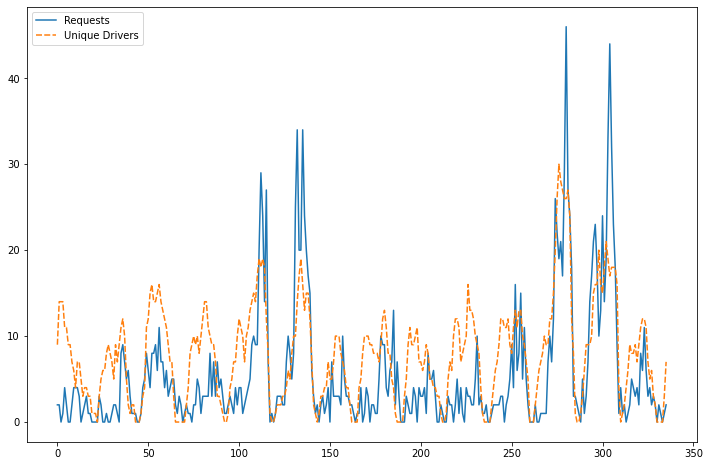

In [36]:
# # True or False: Driver supply always increases when demand increases during the two week period. 
# # Tip: Visualize the data to confirm your answer if needed.

plt.figure(figsize=(12, 8))

sns.lineplot(data=df[['Requests', 'Unique Drivers', 'Timestamp']])

plt.show()

# Question 8

In [37]:
# In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

In [38]:
df['ratio'] = df['Zeroes'].rolling(window = 72, min_periods = 1).sum() / df['Eyeballs'].rolling(window = 72, min_periods = 1).sum()
df.set_index('Timestamp',inplace = True)
df['Time Interval'] = (df.index - pd.Timedelta('3 days')).strftime(time_format) + '-' + df.index.strftime(time_format) 
highest_ratio = df.nlargest(1,'ratio')['Time Interval']

# Question 9

In [39]:
# If you could add 5 drivers to any single hour of 
# every day during the two week period, which 
# hour should you add them to? Hint: Consider both 
# rider eyeballs and driver supply when choosing

grouped_df_2= df.groupby('Time (Local)',as_index = False)[['Eyeballs','Unique Drivers']].sum()
grouped_df_2['ratio'] = grouped_df_2['Unique Drivers']/grouped_df_2['Eyeballs']
add_5_drivers = grouped_df_2.nsmallest(1,'ratio')['Time (Local)']

# Question 10

In [ ]:
# # True or False: There is exactly two weeks of data in this analysis

difference = df.nlargest(1,'Timestamp')['Timestamp'].iloc[0] - df.nsmallest(1,'Timestamp')['Timestamp'].iloc[0]
False_True = pd.Timedelta('14 days') == difference


# Question 11

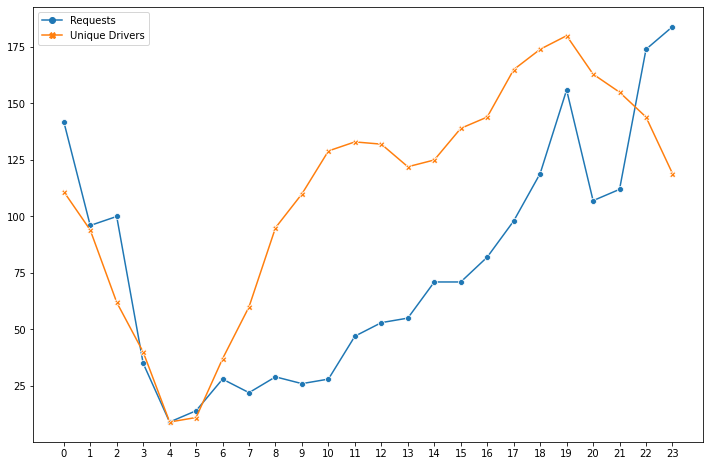

In [40]:
# Looking at the data from all two weeks, 
# which time might make the most sense to consider a true 
# "end day" instead of midnight? (i.e when are supply and 
# demand at both their natural minimums) 
# Tip: Visualize the data to confirm your answer if needed.

plt.figure(figsize = (12,8))
fig = sns.lineplot(data=grouped_df[['Requests','Unique Drivers']], markers = True,dashes = False)
fig.set_xticks(grouped_df['Time (Local)'])
plt.show()